In [1]:
import pandas as pd
import xgboost as xgb

In [2]:
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

In [8]:
dfToUse = df.drop(labels=['cases'],axis=1)
dfToUse = dfToUse[dfToUse['entity'] == 'New York-Nassau']

In [9]:
toDrop = dfToUse.columns[dfToUse.nunique() == 1].tolist()
toDrop.pop()
dfToUse.drop(labels=toDrop, axis=1, inplace=True)

In [10]:
train = dfToUse[dfToUse['date'] < '2020-10-26'].sort_values(by=['date']).reset_index().drop(labels=['index'],axis=1)
test = dfToUse[dfToUse['date'] >= '2020-10-26']
train.date = pd.to_datetime(train.date)
train['month'] = train.date.dt.month
train['day'] = train.date.dt.day

test.date = pd.to_datetime(test.date)
test['month'] = test.date.dt.month
test['day'] = test.date.dt.day



C:\Users\yshik\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\yshik\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yshik\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [14]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

#train.reset_index(inplace=True)

n_splits = 3

tscv = TimeSeriesSplit(n_splits=n_splits)

In [16]:
yTrain = train['incremental_cases']
xTrain = train.drop(labels=['incremental_cases', 'date'],axis=1)


In [17]:
finalXTrain = pd.get_dummies(xTrain)

In [20]:
nEst = [2500, 5000, 7500]
lr = [0.001,0.1,0.5]
md = [4,6,8]
ss = [0.1,0.5,0.8]
rl = [0,1]
gam = [0,0.1,1]
best_score, best_cfg = float("inf"), None
for n in nEst:
    for l in lr:
        for m in md:
            for s in ss:
                for r in rl:
                    for g in gam:
                        eval = (n,l,m,s,r,g)
                        avg = 0
                        print(eval)
                        for train_index, val_index in tscv.split(finalXTrain):
                            train_data, val_data = finalXTrain.loc[train_index], finalXTrain.loc[val_index]
                            yFit = yTrain.loc[train_index]`
                            yVal = yTrain.loc[val_index]
                            model = xgb.XGBRegressor(n_estimators=n, learning_rate=l, max_depth=m, subsample=s, reg_lambda=r, gamma=g)
                            model.fit(train_data, yFit)
                            forecast = model.predict(val_data)
                            mse = mean_squared_error(yVal, forecast)
                            avg += mse
                        if avg < best_score:
                            best_score, best_cfg = avg, eval

(2500, 0.001, 4, 0.1, 0, 0)
(2500, 0.001, 4, 0.1, 0, 0.1)
(2500, 0.001, 4, 0.1, 0, 1)
(2500, 0.001, 4, 0.1, 1, 0)
(2500, 0.001, 4, 0.1, 1, 0.1)
(2500, 0.001, 4, 0.1, 1, 1)
(2500, 0.001, 4, 0.5, 0, 0)
(2500, 0.001, 4, 0.5, 0, 0.1)
(2500, 0.001, 4, 0.5, 0, 1)
(2500, 0.001, 4, 0.5, 1, 0)
(2500, 0.001, 4, 0.5, 1, 0.1)
(2500, 0.001, 4, 0.5, 1, 1)
(2500, 0.001, 4, 0.8, 0, 0)
(2500, 0.001, 4, 0.8, 0, 0.1)
(2500, 0.001, 4, 0.8, 0, 1)
(2500, 0.001, 4, 0.8, 1, 0)
(2500, 0.001, 4, 0.8, 1, 0.1)
(2500, 0.001, 4, 0.8, 1, 1)
(2500, 0.001, 6, 0.1, 0, 0)
(2500, 0.001, 6, 0.1, 0, 0.1)
(2500, 0.001, 6, 0.1, 0, 1)
(2500, 0.001, 6, 0.1, 1, 0)
(2500, 0.001, 6, 0.1, 1, 0.1)
(2500, 0.001, 6, 0.1, 1, 1)
(2500, 0.001, 6, 0.5, 0, 0)
(2500, 0.001, 6, 0.5, 0, 0.1)
(2500, 0.001, 6, 0.5, 0, 1)
(2500, 0.001, 6, 0.5, 1, 0)
(2500, 0.001, 6, 0.5, 1, 0.1)
(2500, 0.001, 6, 0.5, 1, 1)
(2500, 0.001, 6, 0.8, 0, 0)
(2500, 0.001, 6, 0.8, 0, 0.1)
(2500, 0.001, 6, 0.8, 0, 1)
(2500, 0.001, 6, 0.8, 1, 0)
(2500, 0.001, 6, 0.8, 1, 0

(5000, 0.5, 6, 0.8, 0, 0)
(5000, 0.5, 6, 0.8, 0, 0.1)
(5000, 0.5, 6, 0.8, 0, 1)
(5000, 0.5, 6, 0.8, 1, 0)
(5000, 0.5, 6, 0.8, 1, 0.1)
(5000, 0.5, 6, 0.8, 1, 1)
(5000, 0.5, 8, 0.1, 0, 0)
(5000, 0.5, 8, 0.1, 0, 0.1)
(5000, 0.5, 8, 0.1, 0, 1)
(5000, 0.5, 8, 0.1, 1, 0)
(5000, 0.5, 8, 0.1, 1, 0.1)
(5000, 0.5, 8, 0.1, 1, 1)
(5000, 0.5, 8, 0.5, 0, 0)
(5000, 0.5, 8, 0.5, 0, 0.1)
(5000, 0.5, 8, 0.5, 0, 1)
(5000, 0.5, 8, 0.5, 1, 0)
(5000, 0.5, 8, 0.5, 1, 0.1)
(5000, 0.5, 8, 0.5, 1, 1)
(5000, 0.5, 8, 0.8, 0, 0)
(5000, 0.5, 8, 0.8, 0, 0.1)
(5000, 0.5, 8, 0.8, 0, 1)
(5000, 0.5, 8, 0.8, 1, 0)
(5000, 0.5, 8, 0.8, 1, 0.1)
(5000, 0.5, 8, 0.8, 1, 1)
(7500, 0.001, 4, 0.1, 0, 0)
(7500, 0.001, 4, 0.1, 0, 0.1)
(7500, 0.001, 4, 0.1, 0, 1)
(7500, 0.001, 4, 0.1, 1, 0)
(7500, 0.001, 4, 0.1, 1, 0.1)
(7500, 0.001, 4, 0.1, 1, 1)
(7500, 0.001, 4, 0.5, 0, 0)
(7500, 0.001, 4, 0.5, 0, 0.1)
(7500, 0.001, 4, 0.5, 0, 1)
(7500, 0.001, 4, 0.5, 1, 0)
(7500, 0.001, 4, 0.5, 1, 0.1)
(7500, 0.001, 4, 0.5, 1, 1)
(7500, 0.001, 4,

In [23]:
print(best_score, best_cfg)

71018.79176243563 (2500, 0.001, 8, 0.5, 1, 1)


In [40]:
nEst = [2500, 2000,1500]
lr = [0.001,0.01]
md = [8,10,12]
ss = [0.3,0.5]
rl = [1]
gam = [1]
best_score, best_cfg = float("inf"), None
for n in nEst:
    for l in lr:
        for m in md:
            for s in ss:
                for r in rl:
                    for g in gam:
                        eval = (n,l,m,s,r,g)
                        avg = 0
                        print(eval)
                        for train_index, val_index in tscv.split(finalXTrain):
                            train_data, val_data = finalXTrain.loc[train_index], finalXTrain.loc[val_index]
                            yFit = yTrain.loc[train_index]
                            yVal = yTrain.loc[val_index]
                            model = xgb.XGBRegressor(n_estimators=n, learning_rate=l, max_depth=m, subsample=s, reg_lambda=r, gamma=g)
                            model.fit(train_data, yFit)
                            forecast = model.predict(val_data)
                            mse = mean_squared_error(yVal, forecast)
                            avg += mse
                        if avg < best_score:
                            best_score, best_cfg = avg, eval

(2500, 0.001, 8, 0.3, 1, 1)
(2500, 0.001, 8, 0.5, 1, 1)
(2500, 0.001, 10, 0.3, 1, 1)
(2500, 0.001, 10, 0.5, 1, 1)
(2500, 0.001, 12, 0.3, 1, 1)
(2500, 0.001, 12, 0.5, 1, 1)
(2500, 0.01, 8, 0.3, 1, 1)
(2500, 0.01, 8, 0.5, 1, 1)
(2500, 0.01, 10, 0.3, 1, 1)
(2500, 0.01, 10, 0.5, 1, 1)
(2500, 0.01, 12, 0.3, 1, 1)
(2500, 0.01, 12, 0.5, 1, 1)
(2000, 0.001, 8, 0.3, 1, 1)
(2000, 0.001, 8, 0.5, 1, 1)
(2000, 0.001, 10, 0.3, 1, 1)
(2000, 0.001, 10, 0.5, 1, 1)
(2000, 0.001, 12, 0.3, 1, 1)
(2000, 0.001, 12, 0.5, 1, 1)
(2000, 0.01, 8, 0.3, 1, 1)
(2000, 0.01, 8, 0.5, 1, 1)
(2000, 0.01, 10, 0.3, 1, 1)
(2000, 0.01, 10, 0.5, 1, 1)
(2000, 0.01, 12, 0.3, 1, 1)
(2000, 0.01, 12, 0.5, 1, 1)
(1500, 0.001, 8, 0.3, 1, 1)
(1500, 0.001, 8, 0.5, 1, 1)
(1500, 0.001, 10, 0.3, 1, 1)
(1500, 0.001, 10, 0.5, 1, 1)
(1500, 0.001, 12, 0.3, 1, 1)
(1500, 0.001, 12, 0.5, 1, 1)
(1500, 0.01, 8, 0.3, 1, 1)
(1500, 0.01, 8, 0.5, 1, 1)
(1500, 0.01, 10, 0.3, 1, 1)
(1500, 0.01, 10, 0.5, 1, 1)
(1500, 0.01, 12, 0.3, 1, 1)
(1500, 0.01, 1

In [41]:
print(best_score, best_cfg)

40206.09394845058 (1500, 0.001, 8, 0.3, 1, 1)


In [28]:
finalXTrain

,average_grade_performance,average_grade_performance_2,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,...,day,stay_at_home_announced_no,stay_at_home_announced_yes,stay_at_home_effective_no,stay_at_home_effective_yes,precip_flag_A,precip_flag_B,precip_flag_G,precip_flag_I,entity_New York-Nassau
0,NaN,NaN,52.2,44.1,66.9,41.5,1020.0,17.0,10.0,7.2,...,10,1,0,1,0,0,0,1,0,1
1,NaN,NaN,52.5,44.1,62.1,32.5,1017.5,14.6,10.0,6.6,...,11,1,0,1,0,0,0,1,0,1
2,NaN,NaN,43.9,35.1,59.0,33.9,1020.2,17.6,10.0,5.4,...,12,1,0,1,0,0,0,1,0,1
3,NaN,NaN,55.1,46.9,71.1,44.8,1013.9,9.8,6.8,13.9,...,13,1,0,1,0,0,0,1,0,1
4,NaN,NaN,51.0,44.1,62.1,21.5,1023.2,20.3,10.0,10.3,...,14,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,NaN,NaN,63.6,54.0,71.1,61.4,1024.8,22.0,3.6,4.9,...,21,0,1,0,1,0,0,1,0,1
226,NaN,NaN,65.6,61.0,70.0,62.6,1023.7,20.9,4.3,2.3,...,22,0,1,0,1,0,0,1,0,1
227,NaN,NaN,64.6,62.6,68.0,61.5,1022.2,19.7,6.6,4.0,...,23,0,1,0,1,0,0,1,0,1
228,NaN,NaN,63.9,62.1,69.1,59.2,1014.3,12.0,9.6,4.8,...,24,0,1,0,1,0,0,1,0,1


In [42]:
model = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.001, max_depth=8, subsample=0.3, reg_lambda=1, gamma=1).fit(finalXTrain, yTrain)

In [43]:
yTest = test[['incremental_cases', 'entity', 'date']]
xTest = test.drop(labels=['incremental_cases', 'date'],axis=1)
xTest = pd.get_dummies(xTest)
xTest['stay_at_home_announced_no'] = False
xTest['stay_at_home_effective_no'] = False
xTest['precip_flag_A'] = False
xTest['precip_flag_I'] = False
xTest['precip_flag_B'] = False
xTest = xTest[finalXTrain.columns]

In [44]:
preds = model.predict(xTest)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error

In [46]:
mean_absolute_percentage_error(preds, yTest.incremental_cases)

1.4771847646923348

C:\Users\yshik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:title={'center':'Predictions for New York-Nassau County'}, xlabel='date'>

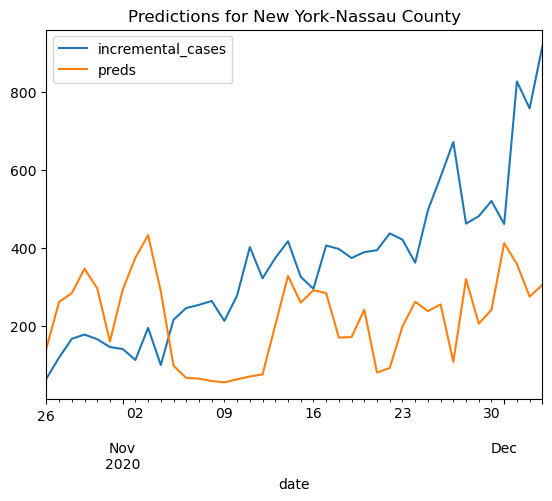

In [47]:
yTest['preds'] = preds
yTest.drop(labels=['entity'],axis=1).plot(x='date', title=('Predictions for New York-Nassau County'))

In [48]:
model = xgb.XGBRegressor().fit(finalXTrain, yTrain)

In [49]:
preds = model.predict(xTest)

In [50]:
mean_absolute_percentage_error(preds, yTest.incremental_cases)

2.4553888229738163